## Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


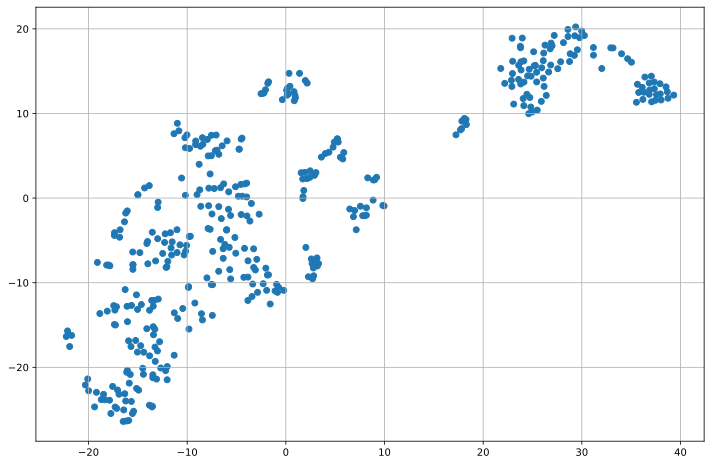

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#Загрузка и разбиение на train и test
data_set = load_boston()
X = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])
y = pd.DataFrame({'price': data_set['target']})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Понижение размерности TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

#Диаграмма
plt.rcParams['figure.figsize'] = (12,8)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],)
plt.grid()
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

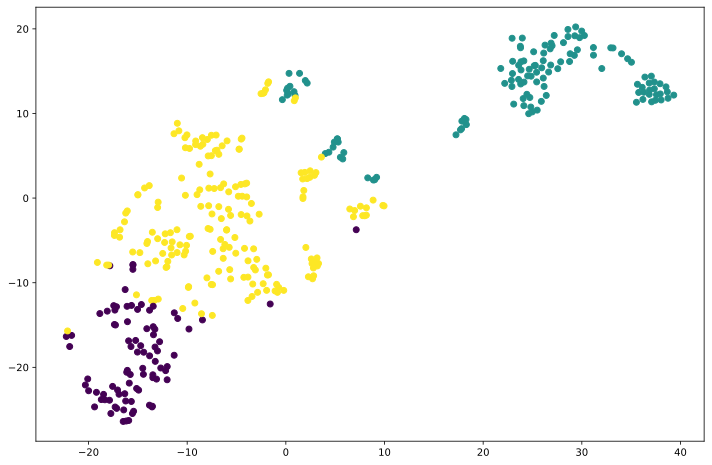

In [2]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = kmean.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [3]:
df_clustered = pd.concat([X_train, y_train], axis=1)
df_clustered['cluster'] = train_labels
df_clustered.groupby('cluster').agg({'price': 'mean', 'CRIM': 'mean'}).rename(columns={'price':'mean_price', 
                                                                                        'CRIM': 'mean_crime'})


,mean_price,mean_crime
cluster,,
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данн


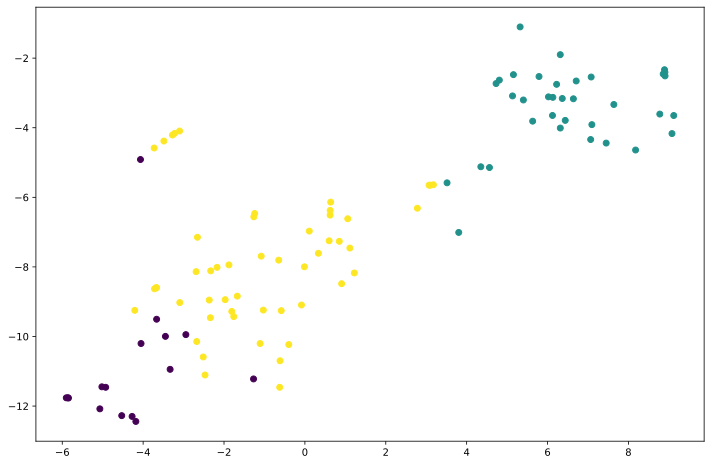

In [4]:
test_labels = kmean.predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [5]:
df_clustered_test = pd.concat([X_test, y_test], axis=1)
df_clustered_test['cluster'] = test_labels
df_clustered_test.groupby('cluster').agg({'price': 'mean', 'CRIM': 'mean'}).rename(columns={'price':'mean_price', 
                                                                                        'CRIM': 'mean_crime'})

,mean_price,mean_crime
cluster,,
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079
